# Homework 3 Notebook

In [361]:
%precision 6
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from numpy.random import exponential, poisson
import pandas as pd

In [2]:
##### Functions #####
# Poisson process
poispr = lambda t, n, lmbd: stats.poisson.pmf(n, mu=t*lmbd)

## Simulating a poisson process

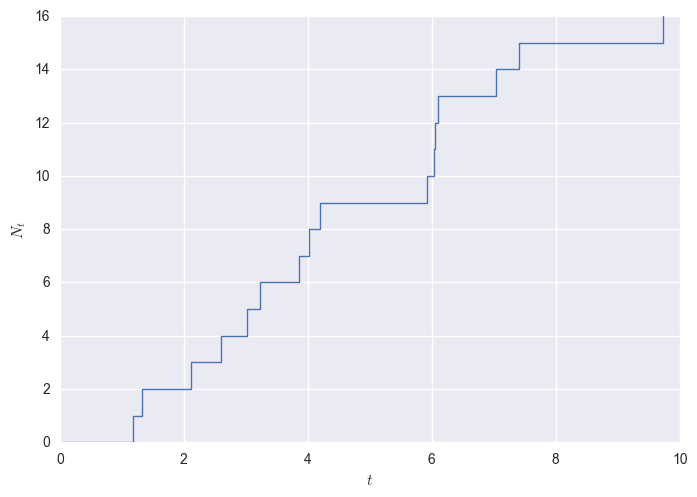

In [438]:
t = 10
lmbda = 1.5
Xt = poisson(lmbda*t)
u = uniform(high=t, size=Xt); u.sort()
plt.step(u, range(0, Xt), where="post", linewidth="1")
plt.xlabel(r"$t$")
plt.ylabel(r"$N_t$")
plt.show()

### 3)
**Let $\{N_t\}_{t\geq0}$ a *Poisson process* with $\lambda=4$**

**3.d Compute $\mathbb{P}(N_3 \leq 3)$**

In [3]:
sum([poispr(3, n, 4) for n in range(0, 3 + 1)])

0.002292

**3.e Compute $\mathbb{P}(N_1 > 3 \ | \ N_2 \geq 2)$**
$$
    \begin{split}
    \mathbb{P}(N_1 > 3 \ | \ N_2 \geq 2) &= \mathbb{P}(N_1 \geq 4 \ | \ N_2 \geq 2) \\
                                         & = \frac{\mathbb{P}(N_1 \geq 4, N_2 \geq 2)}{\mathbb{P}(N_2 \geq 2)} \\
                                         &= \frac{1}{\mathbb{P}(N_2 \geq 2)}\sum_{n=4}^{\infty}\sum_{k=2}^{\infty}\mathbb{P}(N_2 = k, N_1=n) \\
                                         &= \frac{1}{\mathbb{P}(N_2 \geq 2)}\sum_{n=4}^{\infty}\mathbb{P}(N_1=n)\sum_{k=2}^{\infty}\mathbb{P}(N_1 = k-n) \\
                                         &= \frac{1 - \mathbb{P}(N_1 \leq 3)}{1 - \mathbb{P}(N_1 \leq 1)}
    \end{split}
$$

In [20]:
# Theoretical Approximation
e3_ans_num = 1 - sum([poispr(1, n, 4) for n in range(0, 3+1)])
e3_ans_den = 1 - sum([poispr(2, n, 4) for n in range(0, 1+1)])

e3_ans_num / e3_ans_den

0.568246

In [19]:
# A second way to compute it (numerical Approximation)

num_prob = 0
for n in range(4, 101):
    PN1_1 = poispr(1, n, 4)
    for k in range(2, 101):
        PN1_2 = poispr(1, k-n, 4)
        num_prob += PN1_1 * PN1_2
        
num_prob /= (1 - sum([poispr(2, n, 4) for n in range(0, 2)])); num_prob

0.568246

------------
**3.f Compute $\mathbb{P}(N_3 \geq 4 | N_2 > 1)$**

$$
    \begin{split}
    \mathbb{P}(N_3 \geq 4 | N_2 > 1) &= \mathbb{P}(N_3 \geq 4 \ | \ N_2 \geq 2) \\
                                     &= \frac{1}{1 - \mathbb{P}(N_1 \leq 1)}\sum_{k=2}^{\infty}\left[\mathbb{P}(N_2 = k)\sum_{n=4}^{\infty}\mathbb{P}(N_1 = n-k)\right] \\
                                     &= \frac{1}{1 - \mathbb{P}(N_1 \leq 1)}\left[\mathbb{P}(N_2 = 2)[1 - \mathbb{P}(N_1=0) - \mathbb{P}(N_1=1)] + \\ \mathbb{P}(N_2 = 3)[1 - \mathbb{P}(N_1=0)] + \left(1 - \sum_{k=0}^{3}\mathbb{P}(N_2 = k)\right) \right]
    \end{split}
$$

Denote
$$A:= \mathbb{P}(N_2 = 2)[1 - \mathbb{P}(N_1=0) - \mathbb{P}(N_1=1)]$$

$$B:= \mathbb{P}(N_2 = 3)[1 - \mathbb{P}(N_1=0)]$$

$$C:= \left(1 - \sum_{k=0}^{3}\mathbb{P}(N_2 = k)\right)$$

In [24]:
lmda = 4

f3_ans_den = 1 - sum([poispr(2, n, lmda) for n in range(0, 1 + 1)])

A = poispr(2, 2, lmda)*(1 - poispr(1, 0, lmda) - poispr(1, 1, lmda))
B = poispr(2, 3, lmda) * (1 - poispr(1, 0, lmda))
C = 1 - sum([poispr(2, n, lmda) for n in range(0, 3 + 1)])

f3_ans = (A + B + C) / f3_ans_den; f3_ans

0.998488

In [28]:
f3_ans_num = 0
for k in range(2, 101):
    PN2 = poispr(2, k, lmda)
    for n in range(4, 101):
        PN1 = poispr(1, n-k, lmda)
        f3_ans_num += PN2 * PN1

f3_ans_num / f3_ans_den

0.998488

### 4)
**Let $\{N_t\}_{t\geq0}$ a poisson process with $\lambda = 1.5$**

**4.b) compute**
$$
    \mathbb{E}[W_7|W_5=4]
$$

In [568]:
# Numerical Approximation Approach
lmbda = 1.5
nsamples = 100000 
epsilon = 0.0005

samples = []

for samp in range(70):
    W5 = []
    W7 = []
    for s in range(nsamples):
        #W_sample = np.round(exponential(scale=1/lmbda, size=7), decimals=0)
        W_sample = exponential(scale=1/lmbda, size=7)
        W_sample = W_sample.cumsum()
        W5.append(W_sample[4])

        if 4 - epsilon < W_sample[4] < 4 + epsilon:
            W7.append(W_sample[6])
            
    samples.append(np.mean(W7))

W7 = np.array(W7)
W5 = np.array(W5)
print("E[W7|W5=4] ≈ {:.6f} (Gamma approx)".format(np.mean(samples)))

E[W7|W5=4] ≈ 5.320859 (Gamma approx)


In [569]:
t = 30
lmbda = 1.5
epsilon = 0.0005

samples = []
for samp in range(70):
    W7 = []
    for i in range(100000):
        Xt = poisson(lmbda*t)
        u = uniform(high=t, size=Xt); u.sort()
        
        if 4 - epsilon < u[4] < 4 + epsilon:
            W7.append(u[6])
    samples.append(np.mean(W7))
print("E[W7|W5=4] ≈ {:.6f} (Poisson approx)".format(np.mean(samples)))

E[W7|W5=4] ≈ 5.333296 (Poisson approx)


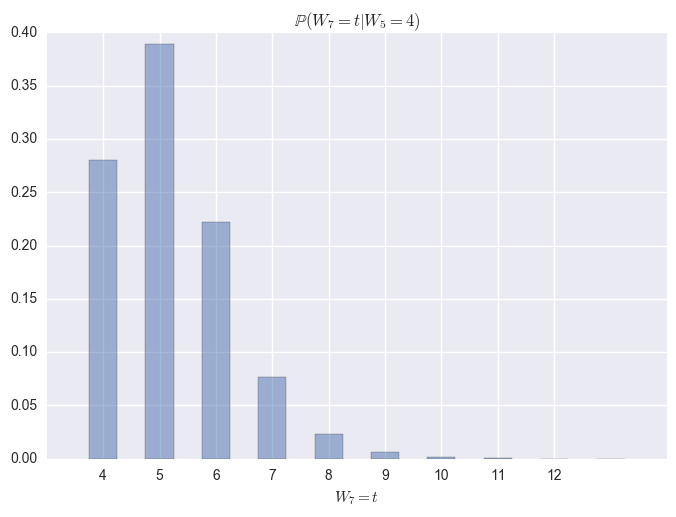

In [308]:
W7_freq = pd.value_counts(W7, normalize=True).sort_index()
plt.bar(W7_freq.index, W7_freq.values, alpha=0.5, width=0.5, align="center")
plt.title(r"$\mathbb{P}(W_7 = t | W_5 = 4)$")
plt.xlim(min(W7_freq.index)-1, max(W7_freq.index)+1)
plt.xticks(range(int(min(W7_freq.index)),int(max(W7_freq.index)),1))
plt.xlabel(r"$W_7 = t$")
plt.show()

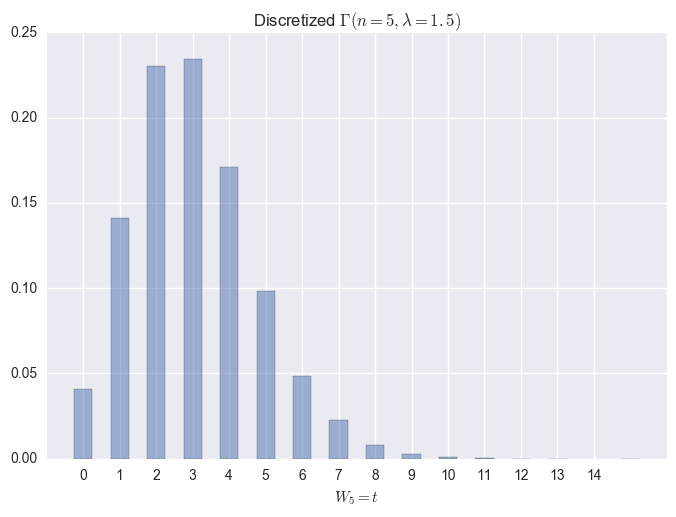

In [307]:
W5_freq = pd.value_counts(W5, normalize=True).sort_index()
plt.bar(W5_freq.index, W5_freq.values, alpha=0.5, width=0.5, align="center")
plt.title(r"Discretized $\Gamma(n=5,\lambda=1.5)$")
plt.xlim(min(W5_freq.index)-1, max(W5_freq.index)+1)
plt.xticks(range(0,int(max(W5_freq.index)),1))
plt.xlabel(r"$W_5 = t$")
plt.show()

In [187]:
from scipy.misc import factorial
from numpy import exp

def gamma_pdf(n, lmbda, t):
    if n > 0 and lmbda > 0 and t >= 0:
        return lmbda ** n * t ** (n-1) * exp(-lmbda * t) / factorial(n-1)
    else: 
        return 0

In [460]:
[t*poi]

4.637085